In [1]:
import prtools as pr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

# Exercise 2.2

In [47]:
bias = np.ones((2,1))
Z = np.hstack((XX, bias))
ZZ = np.dot(Z.T, Z)

print("Z:", "\n", str(Z))
print("ZZ:", "\n", str(ZZ))
print("ZZ_inv", "\n", "singular martrix")

Z: 
 [[ 8.  8.  1.]
 [ 8. 10.  1.]]
ZZ: 
 [[128. 144.  16.]
 [144. 164.  18.]
 [ 16.  18.   2.]]
ZZ_inv 
 singular martrix


# Exercise 2.3

In [48]:
X = np.array([[1,1], [-2,1]])
Y = np.array([[-1], [1]])

XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
XY = np.dot(X.T, Y)

w = np.dot(XX_inv, XY)

print("w:", '\n', str(w))

w: 
 [[-0.66666667]
 [-0.33333333]]


In [49]:
sqres = np.sum(np.square(np.dot(X, w) - Y))
print(sqres)

0.0


# Exercise 2.4

In [50]:
X = np.array([-2, -1, 0, 3]).T
Y = np.array([1, 1, 2, 3]).T
XX = np.dot(X.T, X)
XX_inv = 1./XX
XY = np.dot(X.T, Y)

w = XX_inv * XY
print("w:", '\n', str(w))

sqres = np.sum(np.square(np.dot(X, w) - Y))
print(sqres)

w: 
 0.42857142857142855
12.42857142857143


In [51]:
X = np.array([-2, -1, 0, 3]).reshape(4,1)
bias = np.ones((4,1))
X = np.hstack((X,bias))

XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
XY = np.dot(X.T, Y)

w = np.dot(XX_inv, XY)
print("w:", '\n', str(w))

sqres = np.sum(np.square(np.dot(X, w) - Y))
print(sqres)

w: 
 [0.42857143 1.75      ]
0.17857142857142852


# Exercise 2.5

In [52]:
x = np.random.uniform(low=0, high=1, size=(400)).reshape(400,1)
y = x ** 2 + np.random.normal(size=(1))

In [53]:
x1 = x
x2 = np.hstack((x1, x1 ** 2))
x3 = np.hstack((x2, x1 ** 3))

print(x1.shape)
print(x2.shape)
print(x3.shape)

(400, 1)
(400, 2)
(400, 3)


In [54]:
bias = np.ones((400,1))
Y = y

for xi in [x1, x2, x3]:
    X = np.hstack((xi,bias))
    
    XX = np.dot(X.T, X)
    XX_inv = np.linalg.inv(XX)
    XY = np.dot(X.T, Y)

    w = np.dot(XX_inv, XY)
    print("w:", '\n', str(w))

    sqres = np.sum(np.square(np.dot(X, w) - Y))
    print(sqres)
    print()

w: 
 [[0.98528276]
 [0.22631481]]
2.265351509962673

w: 
 [[-1.20792265e-13]
 [ 1.00000000e+00]
 [ 3.88370010e-01]]
5.230267979643838e-26

w: 
 [[-2.98427949e-13]
 [ 1.00000000e+00]
 [-5.11590770e-13]
 [ 3.88370010e-01]]
2.791975712284433e-24



In [55]:
for xi in [x1, x2, x3]:
    reg = LinearRegression().fit(xi, y)
    y_pred = reg.predict(xi)
    print("MSE:", mean_squared_error(y, y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE: 0.005663378774906684
[[0.98528276]] 
 [0.22631481]

MSE: 1.7957370801466586e-32
[[7.81930769e-17 1.00000000e+00]] 
 [0.38837001]

MSE: 3.201820013944892e-31
[[ 4.38235681e-15  1.00000000e+00 -4.44089210e-15]] 
 [0.38837001]



In [56]:
for xi in [x1, x2, x3]:
    data = pr.gendatr(xi, y)
    w = pr.linearr(data)
    print("MSE:", pr.testr(data, w.eval(data)))
    print("w:", +w)
    print()

MSE: 0.05366201437738716
w: [[0.22631481]
 [0.98528276]]

MSE: 0.10224663955515567
w: [[ 3.88370010e-01]
 [-2.00568728e-14]
 [ 1.00000000e+00]]

MSE: 0.14366047024279124
w: [[3.88370010e-01]
 [9.10382880e-15]
 [1.00000000e+00]
 [2.40918396e-14]]



# Exercise 2.7

In [57]:
x = np.random.randn(10000,2)
y = 50 * np.sin(x[:,0]) * np.sin(x[:,1])

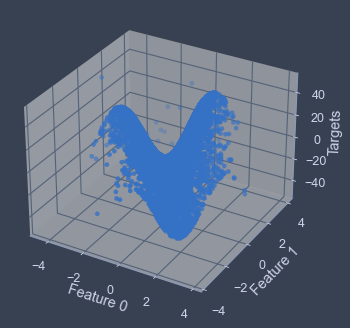

In [58]:
data = pr.gendatr(x, y)
pr.scatterr(data)

In [59]:
x1 = x
x2 = np.hstack((x1, x1 ** 2))
x3 = np.hstack((x2, x1 ** 3))

print(x1.shape)
print(x2.shape)
print(x3.shape)

(10000, 2)
(10000, 4)
(10000, 6)


In [60]:
for xi in [x1, x2, x3]:
    reg = LinearRegression().fit(xi, y)
    y_pred = reg.predict(xi)
    print("MSE:", mean_squared_error(y, y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE: 462.78260308922154
[0.12631964 0.51240059] 
 -0.0576750258269739

MSE: 462.71592992492225
[ 0.12723732  0.51506186 -0.1420316  -0.11433075] 
 0.19769271360423707

MSE: 462.69146615566297
[ 0.27598099  0.39135651 -0.14035628 -0.11637661 -0.04857072  0.04056427] 
 0.19750936091199112



In [61]:
y = x[:, 0] * x[:, 1]

In [62]:
for xi in [x1, x2]:
    reg = LinearRegression().fit(xi, y)
    y_pred = reg.predict(xi)
    print("MSE:", mean_squared_error(y, y_pred))
    print(reg.coef_, '\n', reg.intercept_)
    print()

MSE: 0.9695044944594683
[0.01169535 0.01066818] 
 -0.014052262283229488

MSE: 0.965549868250391
[ 0.01188727  0.01125747 -0.03813932 -0.0224334 ] 
 0.046420634245913285



1.9427229334748133

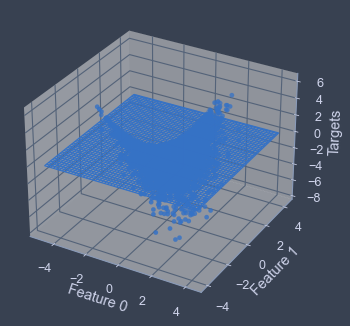

In [63]:
data = pr.gendatr(x1, y)
w = pr.linearr(data)
pr.scatterr(data)
pr.plotr(w)
pr.testr(data, w.eval(data))

# Exercise 2.9 (c)

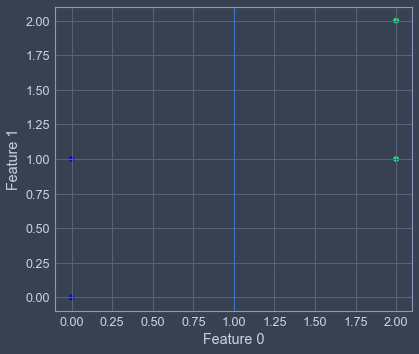

In [181]:
feature = np.array([[0,0], [0,1], [2,1], [2,2]])
label = np.array([-1, -1, 1, 1])
data = pr.prdataset(feature, label)
pr.scatterd(data)
FLD = pr.fisherc(data)
pr.plotc(FLD)

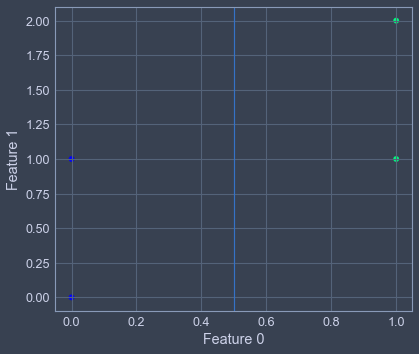

In [182]:
transFeature = feature
transFeature[:, 0] = feature[:, 0]/2
transData = pr.prdataset(transFeature, targets=label)
pr.scatterd(transData)
FLD = pr.fisherc(transData)
pr.plotc(FLD)

# Exercise 2.11

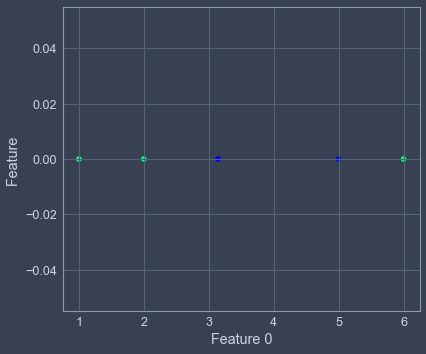

In [64]:
from numpy import pi

x = np.array([1, 2, 6, pi, 5]).reshape(5,1)
y = np.array([1, 1, 1, -1, -1]).reshape(5,1)

data = pr.prdataset(x, targets=y)
pr.scatterd(data)

In [69]:
def h_xa(xSpace = np.linspace(-2, 2, 500), a = 0):
    h = np.array([1 if x>a else -1 for x in xSpace])
    plt.plot(xSpace, h)
    plt.show()
    return h

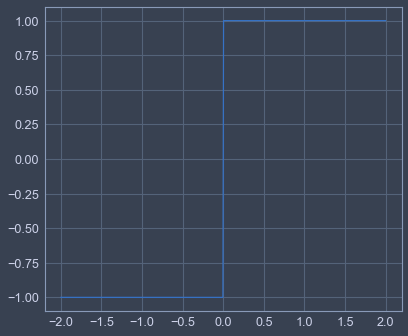

In [70]:
h = h_xa(a=0)

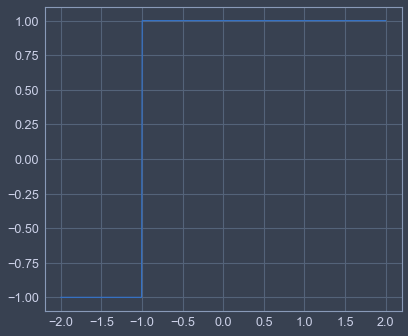

In [71]:
h = h_xa(a=-1)

# Exercise 2.15

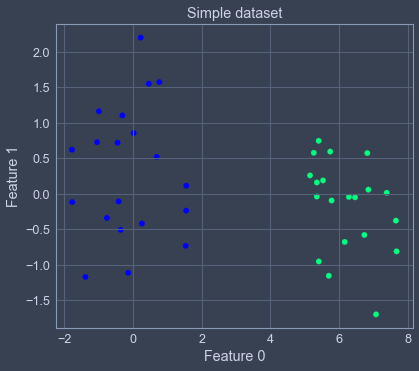

In [94]:
data = pr.gendats([20,20], dim=2, delta=6)
pr.scatterd(data)

In [95]:
feature = +data
label = pr.genlab([20,20], [-1, 1])
# plt.scatter(+data[:,0], +data[:,1], c=label)
# plt.show()

In [185]:
# implement perceptron algorithm

def addBias(x):
    
    bias = np.ones([len(x),1])
    x = np.hstack((x,bias))
    print("feature's shape:", x.shape)
    
    return x

def forward(x, w):
    
    y = np.dot(x, w) # x(nxd) dot w(dx1) = y(nx1)
    y_hat = np.where(y>=0, 1, -1)
    
    return y_hat

def criterion(x, y, w):
    
    y_hat = forward(x, w)
    t = np.where(y == y_hat[:,0], 0, 1)
    a = np.dot(x, w)
    
    loss = np.sum(a[:,0] * t)
    gradient = np.dot(x.T, t.reshape([t.shape[0],1]))
    
#     print(y_hat[:5].T)
#     print(y[:5])
#     print(t[:5])
#     print(a[:5,0] * t[:5])
#     print(np.sum(a[:5,0] * t[:5]))
    
    return loss, gradient

def paramsUpdate(x, y, w, rate):
    
    _, gradient = criterion(x, y, w)
    w += -rate * gradient
    
    return w

def backward(x, y, w, rate):
    
    loss = np.float("inf")
    while(loss != 0.):
        w = paramsUpdate(x, y, w, rate)
        loss, _ = criterion(x, y, w)
    
    return w

def decisionBoundary(data, w):
    x_min = np.min(+data[:,0])
    x_max = np.max(+data[:,0])
    feature_x = np.linspace(x_min, x_max, num=500)
    featuree_y = -w[0]/w[1] * feature_x -w[2]/w[1]
    pr.scatterd(data)
    plt.plot(feature_x, featuree_y)
    plt.show()

In [97]:
feature = addBias(feature)

feature's shape: (40, 3)


In [98]:
w = np.ones([len(feature[0]),1])
y_hat = forward(feature, w)
print(y_hat[:10].T)

[[ 1  1  1 -1  1 -1 -1  1  1  1]]


In [99]:
w = np.ones([len(feature[0]),1])
Ep, gradient = criterion(feature, label, w)
print(Ep)
print(gradient)

27.045335971006125
[[ 3.49268423]
 [ 8.55265174]
 [15.        ]]


In [100]:
w = np.ones([len(feature[0]),1])
w = paramsUpdate(feature, label, w, rate=0.01)
print(w)

[[0.96507316]
 [0.91447348]
 [0.85      ]]


In [130]:
w = np.ones([len(feature[0]),1])
w = backward(feature, label, w, rate=0.01)
print(w)

[[ 0.26253243]
 [ 0.09930584]
 [-0.43      ]]


40


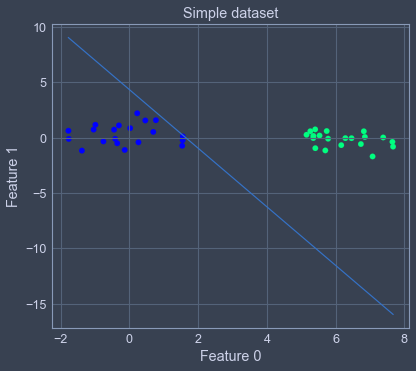

In [131]:
y_hat = forward(feature, w)
acc = np.sum(y_hat[:,0] == label)
print(acc)
decisionBoundary(data, w)

# Exercise 2.9 (b)

In [127]:
#[x1, x2, x3] -> [x1-x2, 2*x2, 2*x1+x3]
linearTrans = np.array([[1,-1,0], [0,2,0], [2,0,1]]).T
testX = np.array([3,6,9]).reshape(1,3)
transX = np.dot(testX, linearTrans)
print("transX: ", transX)

transX:  [[-3 12 15]]


40


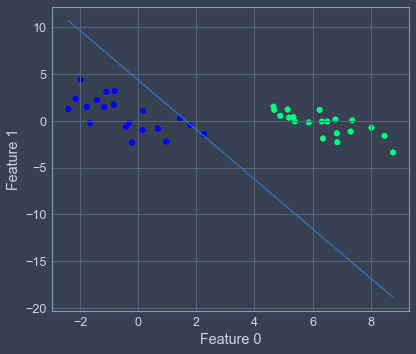

In [141]:
transFeature = np.dot(feature, linearTrans)
transY_hat = forward(transFeature, w)
acc = np.sum(y_hat[:,0] == label)
print(acc)
plt.scatter(transFeature[:,0], transFeature[:,1], c=label)
transData = pr.prdataset(transFeature, targets=label)
decisionBoundary(transData, w)
plt.show()

# Exercise 2.16

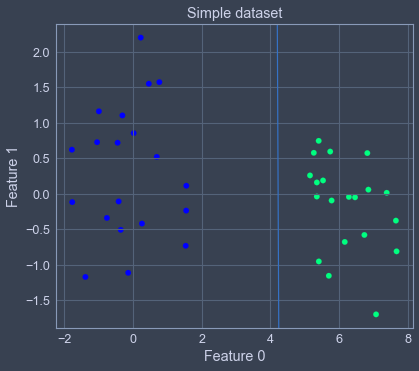

In [105]:
fisher = pr.fisherc()
fisher.train(data)
pr.scatterd(data)
pr.plotc(fisher)